In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [9]:
df = pd.read_csv('Daily_Minimum_Temperatures.csv')
df.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [10]:
df.tail()

,Date,Temp
2915,26-12-1988,9.5
2916,27-12-1988,12.9
2917,28-12-1988,12.9
2918,29-12-1988,14.8
2919,30-12-1988,14.1


In [11]:
df.shape

(2920, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2920 non-null   object 
 1   Temp    2920 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.8+ KB


In [13]:
time = pd.date_range(start='1/1/1981',periods=2920,freq='D')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['Date'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [14]:
df.head()

,Temp
time_stamp,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [15]:
df.tail()

,Temp
time_stamp,
1988-12-25,9.5
1988-12-26,12.9
1988-12-27,12.9
1988-12-28,14.8
1988-12-29,14.1


In [16]:
df.min()

Temp    0.0
dtype: float64

In [17]:
df = df + 1

In [18]:
df

,Temp
time_stamp,
1981-01-01,21.7
1981-01-02,18.9
1981-01-03,19.8
1981-01-04,15.6
1981-01-05,16.8
...,...
1988-12-25,10.5
1988-12-26,13.9
1988-12-27,13.9


In [19]:
df.head()

,Temp
time_stamp,
1981-01-01,21.7
1981-01-02,18.9
1981-01-03,19.8
1981-01-04,15.6
1981-01-05,16.8


In [20]:
df.tail()

,Temp
time_stamp,
1988-12-25,10.5
1988-12-26,13.9
1988-12-27,13.9
1988-12-28,15.8
1988-12-29,15.1


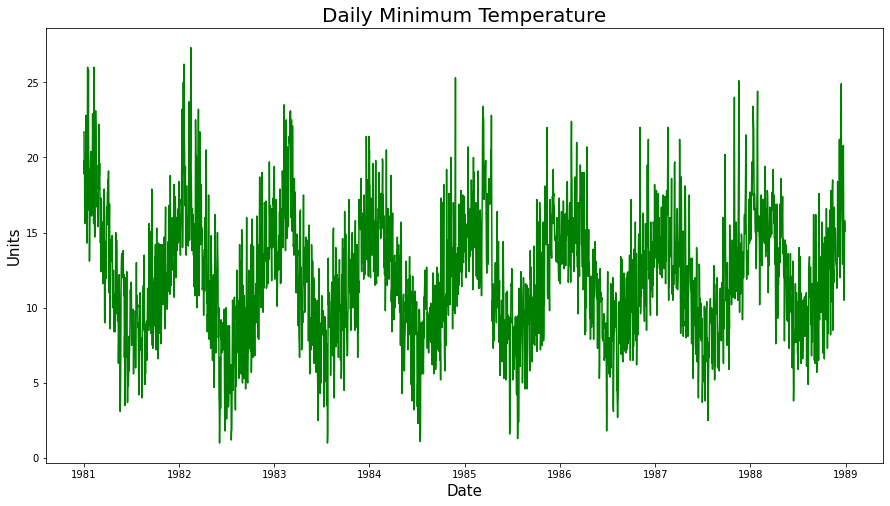

In [21]:
plt.plot(df,color='green')
plt.title('Daily Minimum Temperature',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.show()

In [22]:
plt.rcParams['figure.figsize'] = [15,8]

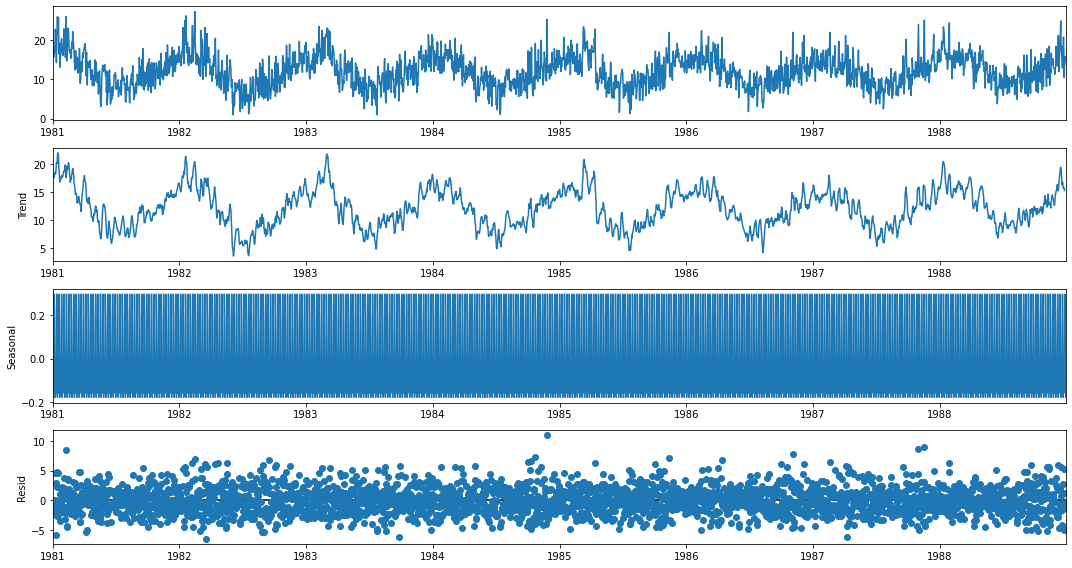

In [23]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

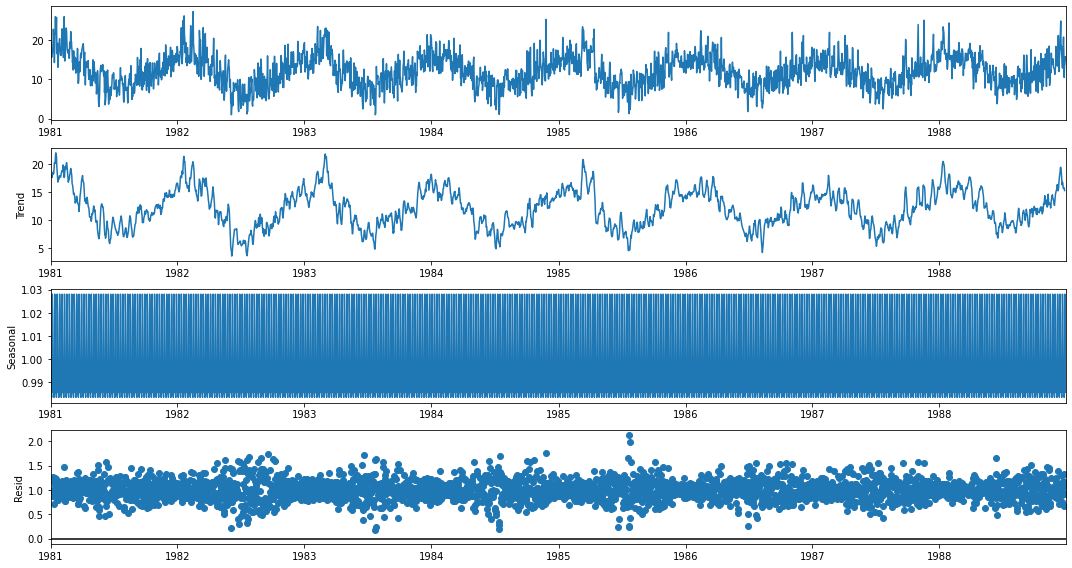

In [24]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

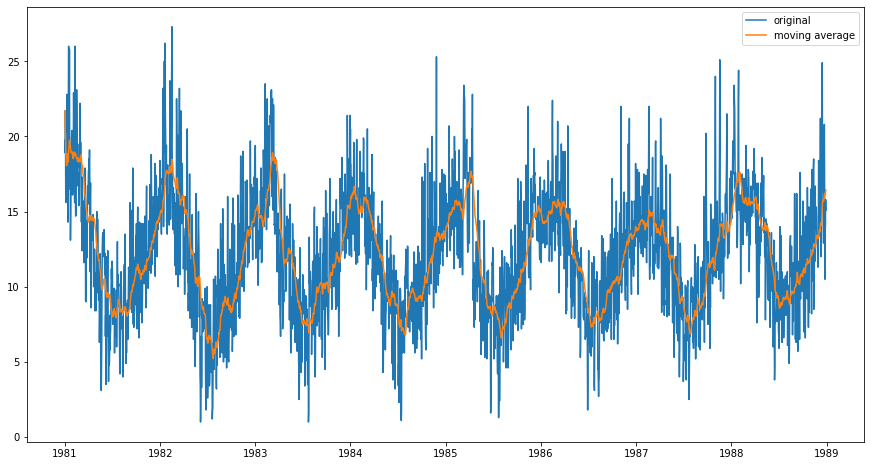

In [25]:
plt.plot(df,label='original')
plt.plot(df.rolling(30,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [26]:
# Model building - Exponential Smoothing Techniques

In [27]:
train = df.iloc[:2628]
test = df.iloc[2628:]

In [28]:
train.tail()

,Temp
time_stamp,
1988-03-08,17.2
1988-03-09,15.5
1988-03-10,11.0
1988-03-11,13.6
1988-03-12,12.9


In [29]:
test.head()

,Temp
time_stamp,
1988-03-13,12.8
1988-03-14,14.4
1988-03-15,15.5
1988-03-16,16.7
1988-03-17,16.3


In [30]:
len(train)

2628

In [31]:
len(test)

292

##### Simple Exponential Smoothing

In [32]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=0.7495088)
SES_model.summary()

Dep. Variable:,Temp,No. Observations:,2628
Model:,SimpleExpSmoothing,SSE,19041.225
Optimized:,True,AIC,5208.447
Trend:,None,BIC,5220.195
Seasonal:,None,AICC,5208.462
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,23:42:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7495088,alpha,False
initial_level,20.993961,l.0,True


In [33]:
SES_predict = SES_model.forecast(len(test))

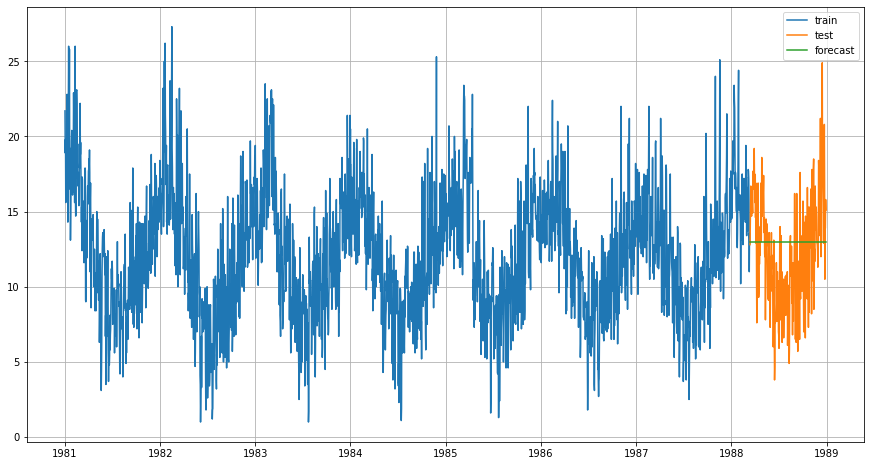

In [34]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [35]:
print("MAE:",MAE(test['Temp'],SES_predict))
print("MAPE:",MAPE(test['Temp'],SES_predict))

MAE: 2.9651304982849274
MAPE: 30.03678055177122


##### Double Exponential Smoothing

In [36]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level = 0.695088,
                   smoothing_trend = 0.01)
DES_model.summary()

Dep. Variable:,Temp,No. Observations:,2628
Model:,Holt,SSE,19066.451
Optimized:,True,AIC,5215.926
Trend:,Additive,BIC,5239.422
Seasonal:,None,AICC,5215.959
Seasonal Periods:,None,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,23:43:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6950880,alpha,False
smoothing_trend,0.0100000,beta,False


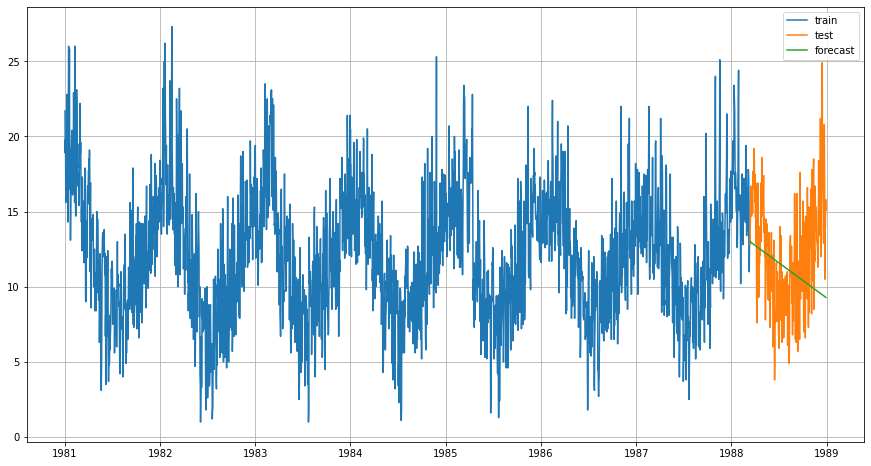

In [37]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [38]:
print("MAE:",MAE(test['Temp'],DES_predict))
print("MAPE:",MAPE(test['Temp'],DES_predict))

MAE: 3.0878090864107692
MAPE: 27.094913936651572


##### Triple Exponential Smoothing

In [39]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
TES_model = TES.fit(smoothing_level = 0.695088,
                   smoothing_trend = 0.01,
                   smoothing_seasonal=0.00001)
TES_model.summary()

Dep. Variable:,Temp,No. Observations:,2628
Model:,ExponentialSmoothing,SSE,18936.659
Optimized:,True,AIC,5211.976
Trend:,Additive,BIC,5276.589
Seasonal:,Additive,AICC,5212.115
Seasonal Periods:,7,Date:,"Sat, 02 Apr 2022"
Box-Cox:,False,Time:,23:44:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6950880,alpha,False
smoothing_trend,0.0100000,beta,False


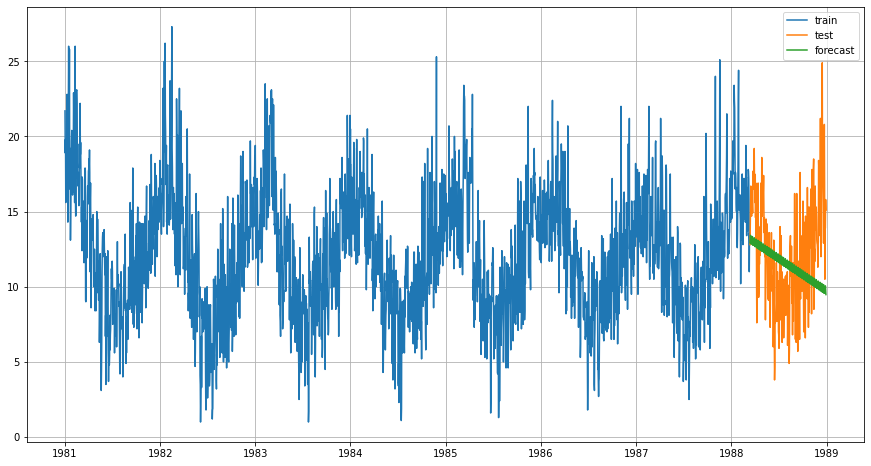

In [40]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [41]:
print("MAE:",MAE(test['Temp'],TES_predict))
print("MAPE:",MAPE(test['Temp'],TES_predict))

MAE: 3.046764802797059
MAPE: 27.295013018115238


##### ACF and PACF plots

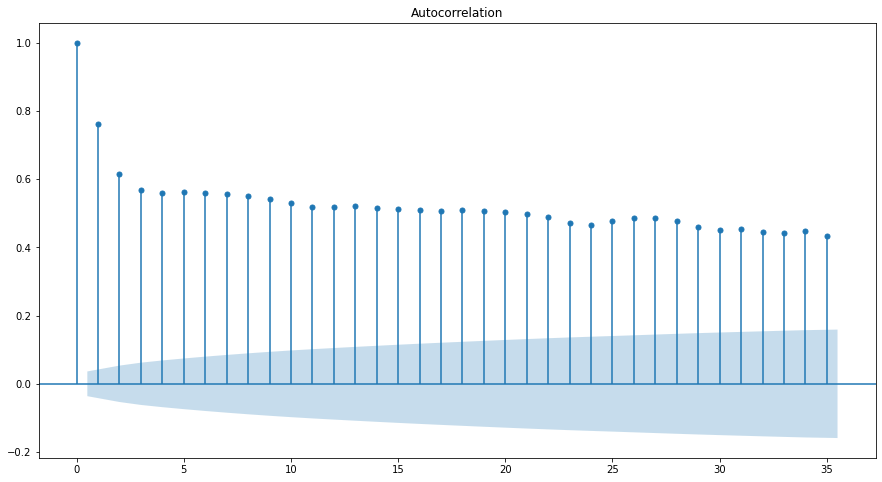

In [42]:
plot_acf(df)
plt.show()

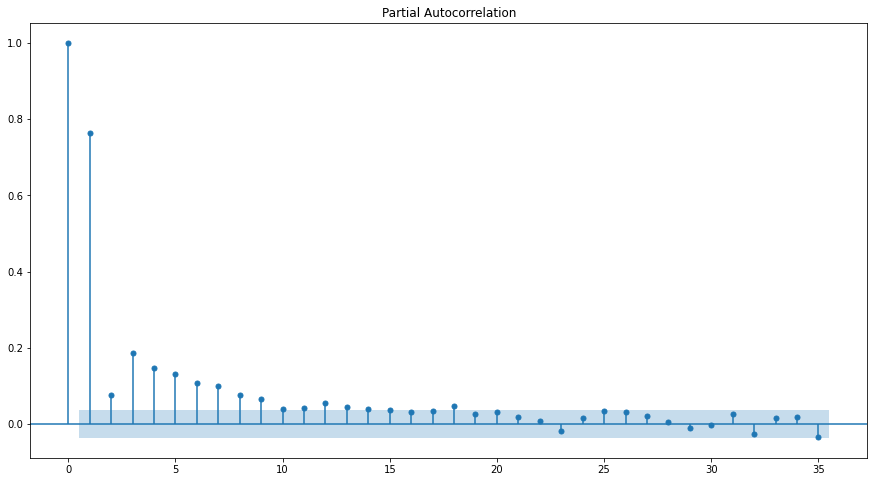

In [43]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [44]:
observations = df.values
df_results = adfuller(observations)
df_results

(-4.172750138312113,
 0.0007324875109184439,
 19,
 2900,
 {'1%': -3.4326069302485953,
  '5%': -2.8625371602624137,
  '10%': -2.567300816765755},
 13415.521599934222)

In [187]:
##### Stationary series -- proceed with ARMA model

##### ARMA Model

In [45]:
model=ARMA(train,(1,1))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 2628
Model:                     ARMA(1, 1)   Log Likelihood               -6241.179
Method:                       css-mle   S.D. of innovations              2.601
Date:                Sat, 02 Apr 2022   AIC                          12490.357
Time:                        23:45:56   BIC                          12513.853
Sample:                    01-01-1981   HQIC                         12498.866
                         - 03-12-1988                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1231      0.277     43.812      0.000      11.581      12.665
ar.L1.Temp     0.8591      0.017     49.345      0.000       0.825       0.893
ma.L1.Temp    -0.2300      0.044     -5.282      0.0

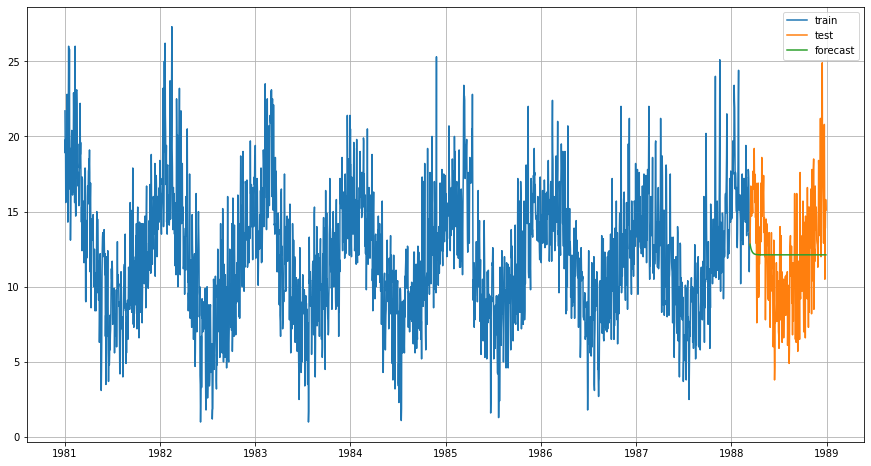

In [46]:
forecasted_values_arma = pd.Series(model_fit.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arma,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
print("MAE:",MAE(test['Temp'],forecasted_values_arma))
print("MAPE:",MAPE(test['Temp'],forecasted_values_arma))

MAE: 2.857130726113565
MAPE: 27.233448387905202


##### SARIMA Model

In [266]:
import itertools
p = q = range(0,4)
d = range(0,1)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [267]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 0, 0) (0, 0, 0, 12) AIC: 20842.661043894546
SARIMAX (0, 0, 0) (0, 0, 1, 12) AIC: 18470.447742914046
SARIMAX (0, 0, 0) (0, 0, 2, 12) AIC: 17148.807735759943
SARIMAX (0, 0, 0) (0, 0, 3, 12) AIC: 16309.560259031994
SARIMAX (0, 0, 0) (1, 0, 0, 12) AIC: 14584.101264551537
SARIMAX (0, 0, 0) (1, 0, 1, 12) AIC: 13850.792826080651
SARIMAX (0, 0, 0) (1, 0, 2, 12) AIC: 13778.391107322306
SARIMAX (0, 0, 0) (1, 0, 3, 12) AIC: 13685.405835073148
SARIMAX (0, 0, 0) (2, 0, 0, 12) AIC: 13941.294096097989
SARIMAX (0, 0, 0) (2, 0, 1, 12) AIC: 13782.238147027103
SARIMAX (0, 0, 0) (2, 0, 2, 12) AIC: 13777.485546236869
SARIMAX (0, 0, 0) (2, 0, 3, 12) AIC: 13679.66276257349
SARIMAX (0, 0, 0) (3, 0, 0, 12) AIC: 13738.678573309724
SARIMAX (0, 0, 0) (3, 0, 1, 12) AIC: 13701.031733903488
SARIMAX (0, 0, 0) (3, 0, 2, 12) AIC: 13688.100360900795
SARIMAX (0, 0, 0) (3, 0, 3, 12) AIC: 13677.912043703443
SARIMAX (0, 0, 1) (0, 0, 0, 12) AIC: 17983.816326517597
SARIMAX (0, 0, 1) (0, 0, 1, 12) AIC: 16360.525223

SARIMAX (2, 0, 1) (0, 0, 3, 12) AIC: 12043.230592162778
SARIMAX (2, 0, 1) (1, 0, 0, 12) AIC: 12158.627156548155
SARIMAX (2, 0, 1) (1, 0, 1, 12) AIC: 12167.538819714864
SARIMAX (2, 0, 1) (1, 0, 2, 12) AIC: 12107.29243985843
SARIMAX (2, 0, 1) (1, 0, 3, 12) AIC: 12045.320702239405
SARIMAX (2, 0, 1) (2, 0, 0, 12) AIC: 12092.731014701636
SARIMAX (2, 0, 1) (2, 0, 1, 12) AIC: 12108.681580745708
SARIMAX (2, 0, 1) (2, 0, 2, 12) AIC: 12096.624539245055
SARIMAX (2, 0, 1) (2, 0, 3, 12) AIC: 12048.325557845528
SARIMAX (2, 0, 1) (3, 0, 0, 12) AIC: 12042.701223607944
SARIMAX (2, 0, 1) (3, 0, 1, 12) AIC: 12041.339786965042
SARIMAX (2, 0, 1) (3, 0, 2, 12) AIC: 12049.629941032941
SARIMAX (2, 0, 1) (3, 0, 3, 12) AIC: 12050.563963440767
SARIMAX (2, 0, 2) (0, 0, 0, 12) AIC: 12171.501685459902
SARIMAX (2, 0, 2) (0, 0, 1, 12) AIC: 12118.847735962965
SARIMAX (2, 0, 2) (0, 0, 2, 12) AIC: 12054.132973007316
SARIMAX (2, 0, 2) (0, 0, 3, 12) AIC: 12005.11382128622
SARIMAX (2, 0, 2) (1, 0, 0, 12) AIC: 12123.1004378

In [326]:
df_score.sort_values('aic')[:20]

,param,seasonal,aic
119,"(1, 0, 3)","(1, 0, 3, 12)",11994.150842
115,"(1, 0, 3)","(0, 0, 3, 12)",11995.337349
243,"(3, 0, 3)","(0, 0, 3, 12)",11995.628351
179,"(2, 0, 3)","(0, 0, 3, 12)",11995.962779
123,"(1, 0, 3)","(2, 0, 3, 12)",11996.980731
183,"(2, 0, 3)","(1, 0, 3, 12)",11997.799700
251,"(3, 0, 3)","(2, 0, 3, 12)",11998.029631
127,"(1, 0, 3)","(3, 0, 3, 12)",11998.050713
247,"(3, 0, 3)","(1, 0, 3, 12)",11998.320106
187,"(2, 0, 3)","(2, 0, 3, 12)",11998.415581


In [48]:
model = SARIMAX(train,
                       order = (1,0,1),
                       seasonal_order = (1,0,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Temp   No. Observations:                 2628
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -6237.699
Date:                            Sat, 02 Apr 2022   AIC                          12485.397
Time:                                    23:47:15   BIC                          12514.740
Sample:                                01-01-1981   HQIC                         12496.026
                                     - 03-12-1988                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8582      0.013     66.883      0.000       0.833       0.883
ma.L1         -0.2286      0.023   

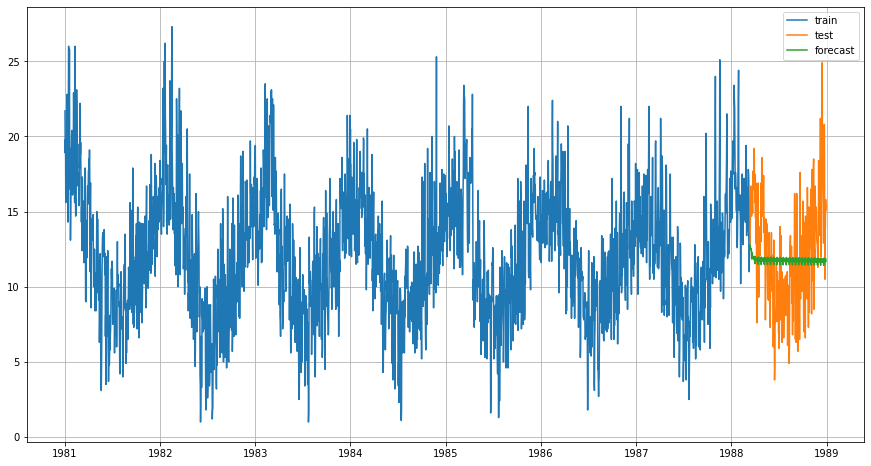

In [49]:
forecast = sarimax_results.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [50]:
print("MAE:",MAE(test['Temp'],forecast))
print("MAPE:",MAPE(test['Temp'],forecast))

MAE: 2.864236559301946
MAPE: 26.473550688045812
